<a href="https://colab.research.google.com/github/teknas777/Exploratory-Data-Analysis/blob/main/Playstore_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Project Name** - **Playstore App Review Analysis**

### **Project Summary**

The Play Store dataset was analyzed to understand the key factors driving app success, focusing on ratings, reviews, installs, price, size, content rating, and user sentiment. Additionally, user reviews were examined to identify customer sentiment trends for the top 15 apps.

Key preprocessing steps included handling missing values, cleaning data types, and transforming variables for accurate analysis. Various visualizations were created to explore relationships between installs, ratings, reviews, price, and sentiment.

### **Key Analysis & Findings**

1️⃣ Rating vs Installs:

Apps with higher installs tend to have better ratings, but exceptions exist.
Mid-range ratings (3.5 - 4.5) tend to perform best in terms of engagement.

2️⃣ Reviews vs Installs:

More reviews generally indicate higher installs and engagement.
Apps with positive reviews tend to maintain high installs and retention rates.

3️⃣ Price vs Installs:

Free apps dominate the Play Store, with paid apps having lower install numbers.
Premium apps require strong value propositions to attract users.

4️⃣ Category vs Installs:

Game, Communication, and Social categories have the highest installs.
Utility apps (Productivity, Finance, Education) have steady engagement.

5️⃣ Content Rating vs Installs:

Apps rated “Everyone” have significantly higher installs, showing broad accessibility.
Mature content (18+) apps tend to have lower installs but strong niche engagement.

6️⃣ Sentiment Analysis of User Reviews (Top 15 Apps):

Apps with higher positive sentiment tend to have higher ratings and retention.
Apps with a large number of negative reviews need immediate user experience improvements.
Neutral reviews indicate areas for enhancement but not outright dissatisfaction.

### **Problem Statement**

The Google Play Store is a highly competitive marketplace with thousands of mobile applications across various categories. Understanding the factors that drive app success, including user engagement, ratings, reviews, and installs, is crucial for developers and businesses aiming to optimize their apps for maximum reach and revenue. However, identifying the key attributes that influence app popularity and user satisfaction remains a challenge. By analyzing structured app data and user reviews, we can uncover actionable insights that help developers enhance app quality, improve user retention, and make data-driven business decisions.

### **Business Objective**

The objective of this Exploratory Data Analysis (EDA) is to identify critical factors that contribute to the success of mobile applications on the Google Play Store. The analysis aims to:

1) Understand Key Success Metrics:

Identify relationships between app rating, category, size, installs, and pricing strategy.
Analyze how content rating and genre impact app engagement.

2) Analyze User Sentiment and Reviews:

Determine sentiment trends in user reviews (Positive, Neutral, Negative).
Explore how sentiment polarity and subjectivity affect app ratings.

3) Derive Actionable Insights for App Optimization:

Recommend strategies for improving ratings and user satisfaction.
Identify optimal app pricing and category trends for market success.

### **Know your data**

#### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df1 = pd.read_csv('/content/drive/MyDrive/data_wrangling/Play Store Data (1).csv')
df2 = pd.read_csv('/content/drive/MyDrive/data_wrangling/User Reviews (1).csv')

In [5]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
df1.shape

(10841, 13)

### Duplicate Values

In [8]:
df1.duplicated().sum()

483

In [9]:
df1.drop_duplicates(inplace=True)

### Missing Values

In [10]:
df1.isnull().sum()

,0
App,0
Category,0
Rating,1465
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [11]:
df1['Rating'] = df1['Rating'].fillna(df1['Rating'].mean())

In [12]:
df1.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


### Brainstorming

Different factors that determine high engagement and app success(Installs).

1.) Rating vs Installs

2.) Genre vs Installs

3.) Size vs Installs

4.) Relation of Price vs Installs

5.) Type vs Installs

6.) Category vs Installs

7.) Content Rating vs Installs

8.) Relation of Reviews vs Installs

### Analysis (Structure and Planning)

Category 1 : App Popularity

1.) Rating vs Installs

2.) Reviews vs Installs

Category 2 : Pricing

1.) Relation of Price vs Installs

2.) Type vs Installs

Category 3 : Category & Content Rating

1.) Category vs Installs

2.) Content Rating vs Installs

Category 4 : Genre influence

1.)  Genre vs Installs

Category 5 : User Satisfaction

1.) Relation of Reviews vs Installs

### **What do you know about the data?**

The Play Store Data consists of mobile applications listed on the Google Play Store, containing various attributes related to app performance, user engagement, and customer feedback. This dataset can be used for Exploratory Data Analysis (EDA) to uncover trends, correlations, and insights into app success.

### **Key Features in the Dataset**

1. App Information

Category - Primary category the app belongs to (e.g., Games, Productivity).

Genres - Additional subcategories for better classification.

Content Rating - Age group suitability (e.g., Everyone, Teen, Adult).

2. Performance Metrics

Rating - Average user rating (e.g., 4.5).

Reviews - Total number of user reviews.

Size - File size of the app (e.g., 15MB, 50MB).

3. Pricing Information

Type - Whether the app is Free or Paid.

Price - Cost of the app if it’s a paid app.

### **2. Understanding your variables**

In [13]:
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [14]:
df1.describe()

,Rating
count,10358.000000
mean,4.189542
std,0.505405
min,1.000000
25%,4.100000
50%,4.200000
75%,4.500000
max,19.000000


#### Cleaning Installs column

In [15]:
df1['Installs'] = df1['Installs'].replace('Free', 0)

In [16]:
df1["Installs"] = df1["Installs"].str.replace("+", "", regex=False)  # Remove '+'
df1["Installs"] = df1["Installs"].str.replace(",", "", regex=False)  # Remove ','
df1["Installs"] = pd.to_numeric(df1["Installs"], errors="coerce")  # Convert to float

# Verify changes
print(df1["Installs"].unique())


[1.e+04 5.e+05 5.e+06 5.e+07 1.e+05 5.e+04 1.e+06 1.e+07 5.e+03 1.e+08
 1.e+09 1.e+03 5.e+08 5.e+01 1.e+02 5.e+02 1.e+01 1.e+00 5.e+00 0.e+00
    nan]


#### Cleaning the 'Price' column

In [17]:
df1[df1['Price'] == "Everyone"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",NaN,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [18]:
# Replace "Everyone" with NaN
df1['Price'] = df1['Price'].replace("Everyone", float("nan"))

In [19]:
df1['Price'] = df1['Price'].apply(lambda x: float(x.replace("$", "")) if "$" in str(x) else float(x))

In [20]:
df1['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,    nan,   1.2 ,   1.04])

#### Cleaning the Size column

In [21]:
df1['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [22]:
df1['Size'] = df1['Size'].replace("Varies with device", float("nan"))

In [23]:
def convert_size(value):
    value = str(value).lower()  # Convert to string and lowercase

    if "m" in value:
        return float(value.replace("m", ""))  # Remove 'm' (MB) and keep as is

    elif "k" in value:
        return float(value.replace("k", "")) / 1024  # Convert KB to MB (1 KB = 1/1024 MB)

    else:
        return float("nan")  # Handle cases like 'Varies with device'

# Apply function to Size column
df1['Size'] = df1['Size'].apply(convert_size)

# Verify changes
print(df1['Size'].unique())


[1.90000000e+01 1.40000000e+01 8.70000000e+00 2.50000000e+01
 2.80000000e+00 5.60000000e+00 2.90000000e+01 3.30000000e+01
 3.10000000e+00 2.80000000e+01 1.20000000e+01 2.00000000e+01
 2.10000000e+01 3.70000000e+01 2.70000000e+00 5.50000000e+00
 1.70000000e+01 3.90000000e+01 3.10000000e+01 4.20000000e+00
 7.00000000e+00 2.30000000e+01 6.00000000e+00 6.10000000e+00
 4.60000000e+00 9.20000000e+00 5.20000000e+00 1.10000000e+01
 2.40000000e+01            nan 9.40000000e+00 1.50000000e+01
 1.00000000e+01 1.20000000e+00 2.60000000e+01 8.00000000e+00
 7.90000000e+00 5.60000000e+01 5.70000000e+01 3.50000000e+01
 5.40000000e+01 1.96289062e-01 3.60000000e+00 5.70000000e+00
 8.60000000e+00 2.40000000e+00 2.70000000e+01 2.50000000e+00
 1.60000000e+01 3.40000000e+00 8.90000000e+00 3.90000000e+00
 2.90000000e+00 3.80000000e+01 3.20000000e+01 5.40000000e+00
 1.80000000e+01 1.10000000e+00 2.20000000e+00 4.50000000e+00
 9.80000000e+00 5.20000000e+01 9.00000000e+00 6.70000000e+00
 3.00000000e+01 2.600000

#### Cleaning the Reviews column

In [24]:
# Convert 'Reviews' column to numeric
df1['Reviews'] = df1['Reviews'].apply(lambda x: float(x.replace("M", "")) if "M" in str(x) else float(x))

In [25]:
df1['Reviews']

,Reviews
0,159.0
1,967.0
2,87510.0
3,215644.0
4,967.0
...,...
10836,38.0
10837,4.0
10838,3.0
10839,114.0


### Handling Outliers

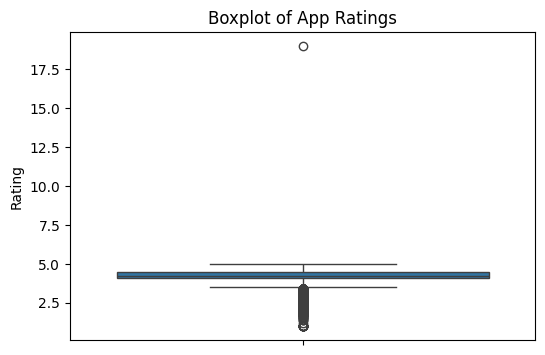

In [26]:
# Boxplot for Ratings
plt.figure(figsize=(6, 4))
sns.boxplot(df1["Rating"])
plt.title("Boxplot of App Ratings")
plt.show()

# Removing outliers for 'Rating' (keeping values between 1 and 5)
df1 = df1[(df1['Rating'] >= 1) & (df1['Rating'] <= 5)]

In [27]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [28]:
df1.to_csv("/content/drive/My Drive/data_wrangling/Cleaned_Playstore_Data.csv", index=False)

In [29]:
data = pd.read_csv("/content/drive/My Drive/data_wrangling/Cleaned_Playstore_Data.csv")

In [30]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Exploratory Data Analysis

Category 1 : App Popularity

1.) Rating vs Installs

2.) Reviews vs Installs

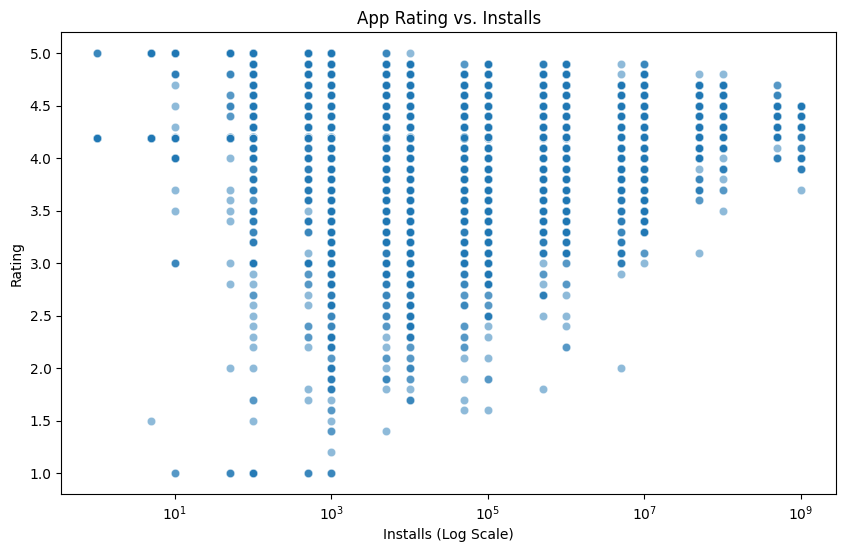

In [31]:
plt.figure(figsize=(10, 6))

# Scatter plot using seaborn
sns.scatterplot(x=data['Installs'], y=data['Rating'], alpha=0.5)

# Set logarithmic scale for better visualization
plt.xscale("log")

# Labels and title
plt.xlabel("Installs (Log Scale)")
plt.ylabel("Rating")
plt.title("App Rating vs. Installs")

# Show the plot
plt.show()


### Observations & Insights

Densely Packed High Ratings (4.0 - 5.0):

Most apps tend to have ratings above 4.0, meaning users generally rate apps favorably.
Few apps have very low ratings (below 2.0).
High Installs = High Ratings?

Apps with millions/billions of installs generally have higher ratings (around 4.5).
This could indicate that popular apps tend to be well-received due to quality, frequent updates, or brand recognition.
Low Install Apps Have More Variability in Ratings:

Apps with fewer installs show a wider spread of ratings.
Some may have very high ratings (5.0) due to a small, loyal user base.
Others might have very low ratings (1.0 - 3.0) if early users are dissatisfied.


### Key takeaways

✅ Popular apps (high installs) generally have stable, high ratings.

✅ Less downloaded apps have more rating variability, meaning user satisfaction is unpredictable.

✅ Most apps have ratings between 4.0 and 5.0, indicating a general trend of positive feedback.

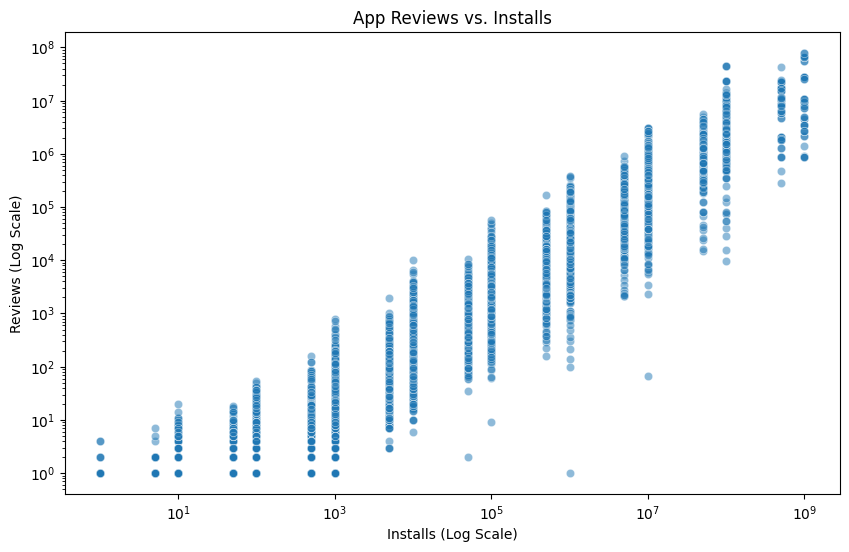

In [32]:
plt.figure(figsize=(10, 6))

# Scatter plot using seaborn
sns.scatterplot(x=df1["Installs"], y=df1["Reviews"], alpha=0.5)

# Set logarithmic scale for better visualization
plt.xscale("log")
plt.yscale("log")  # Reviews also vary widely, so applying log scale

# Labels and title
plt.xlabel("Installs (Log Scale)")
plt.ylabel("Reviews (Log Scale)")
plt.title("App Reviews vs. Installs")

# Show the plot
plt.show()


### Insights

✅ Higher installs generally lead to more reviews (as more users engage with the app).

✅ Some apps may have a high number of installs but fewer reviews, indicating lower user engagement.

✅ Outliers might be present where an app has relatively low installs but a disproportionately high number of reviews.

Category 2 : Pricing

1.) Relation of Price vs Installs

2.) Type vs Installs

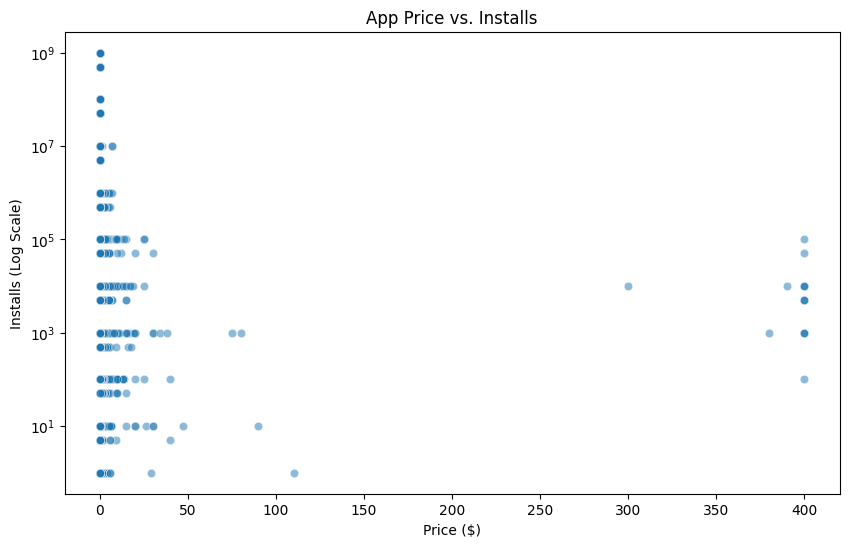

In [33]:
plt.figure(figsize=(10, 6))

# Scatter plot using seaborn
sns.scatterplot(x=df1["Price"], y=df1["Installs"], alpha=0.5)

# Set logarithmic scale for installs (since they range widely)
plt.yscale("log")

# Labels and title
plt.xlabel("Price ($)")
plt.ylabel("Installs (Log Scale)")
plt.title("App Price vs. Installs")

# Show the plot
plt.show()


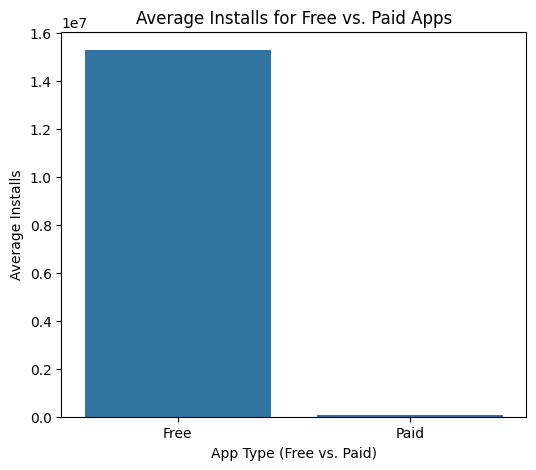

In [34]:
plt.figure(figsize=(6, 5))

# Calculate mean installs by type
avg_installs = df1.groupby("Type")["Installs"].mean()

# Bar plot
sns.barplot(x=avg_installs.index, y=avg_installs.values)

# Labels and title
plt.xlabel("App Type (Free vs. Paid)")
plt.ylabel("Average Installs")
plt.title("Average Installs for Free vs. Paid Apps")

plt.show()


Category 3 : Category & Content Rating

1.) Category vs Installs

2.) Content Rating vs Installs



<ipython-input-35-2487b8b20104>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_installs.index, y=avg_installs.values, palette="viridis")


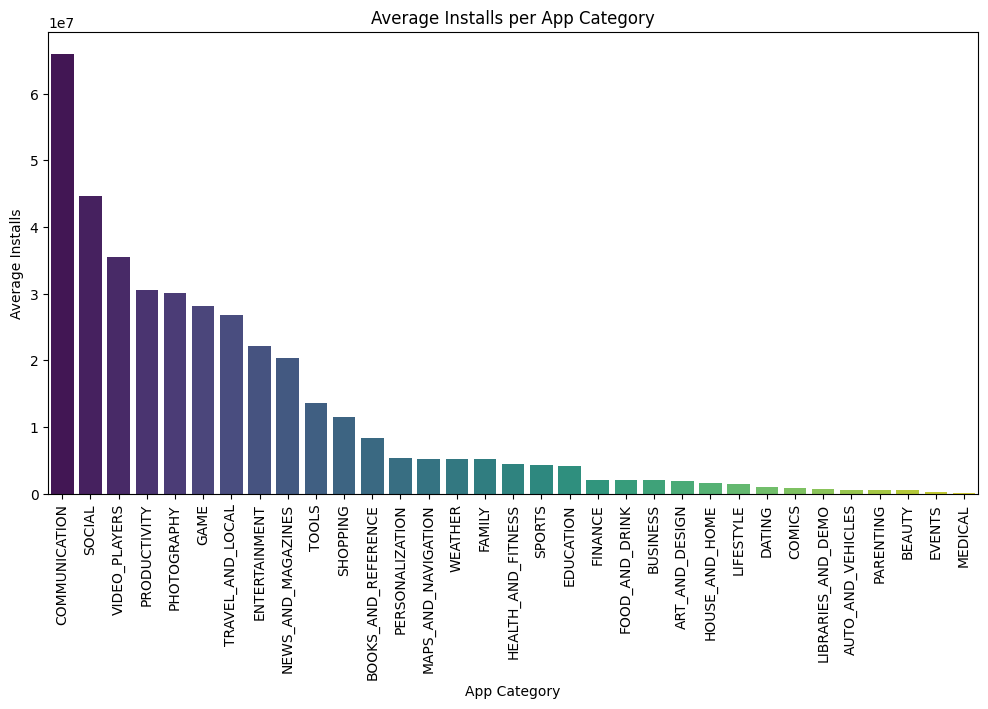

In [35]:
plt.figure(figsize=(12, 6))

# Calculate mean installs by category
avg_installs = df1.groupby("Category")["Installs"].mean().sort_values(ascending=False)

# Bar plot
sns.barplot(x=avg_installs.index, y=avg_installs.values, palette="viridis")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Labels and title
plt.xlabel("App Category")
plt.ylabel("Average Installs")
plt.title("Average Installs per App Category")

plt.show()


Expected Insights :

✅ Social Media, Communication, and Video Streaming apps tend to have the highest installs.

✅ Niche categories like Personalization, Finance, and Productivity may have moderate installs.

✅ Medical or Educational apps may have lower installs but higher engagement from users.

✅ Outliers exist where some categories have specific apps with exceptionally high installs.

<ipython-input-36-2eaa1b3f40f9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_installs.index, y=avg_installs.values, palette="magma")


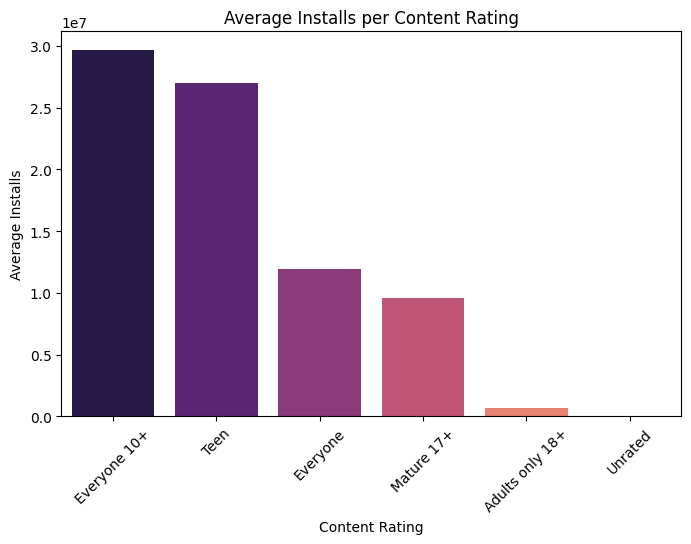

In [36]:
plt.figure(figsize=(8, 5))

# Calculate average installs for each content rating
avg_installs = df1.groupby("Content Rating")["Installs"].mean().sort_values(ascending=False)

# Bar plot
sns.barplot(x=avg_installs.index, y=avg_installs.values, palette="magma")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Labels and title
plt.xlabel("Content Rating")
plt.ylabel("Average Installs")
plt.title("Average Installs per Content Rating")

plt.show()


Expected Insights

✅ Apps rated "Everyone" tend to have the highest installs since they target a wider audience.

✅ "Teen" and "Mature 17+" apps may have fewer installs, depending on the niche.

✅ "Adults Only 18+" apps usually have the least installs due to restrictions.

✅ Outliers may exist where some age-restricted apps have high installs due to niche demand.

Category 4 : Genre influence

1.) Genre vs Installs



<ipython-input-37-8a6ea74074b0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_installs.index[:15], y=avg_installs.values[:15], palette="coolwarm")  # Showing top 15 genres for clarity


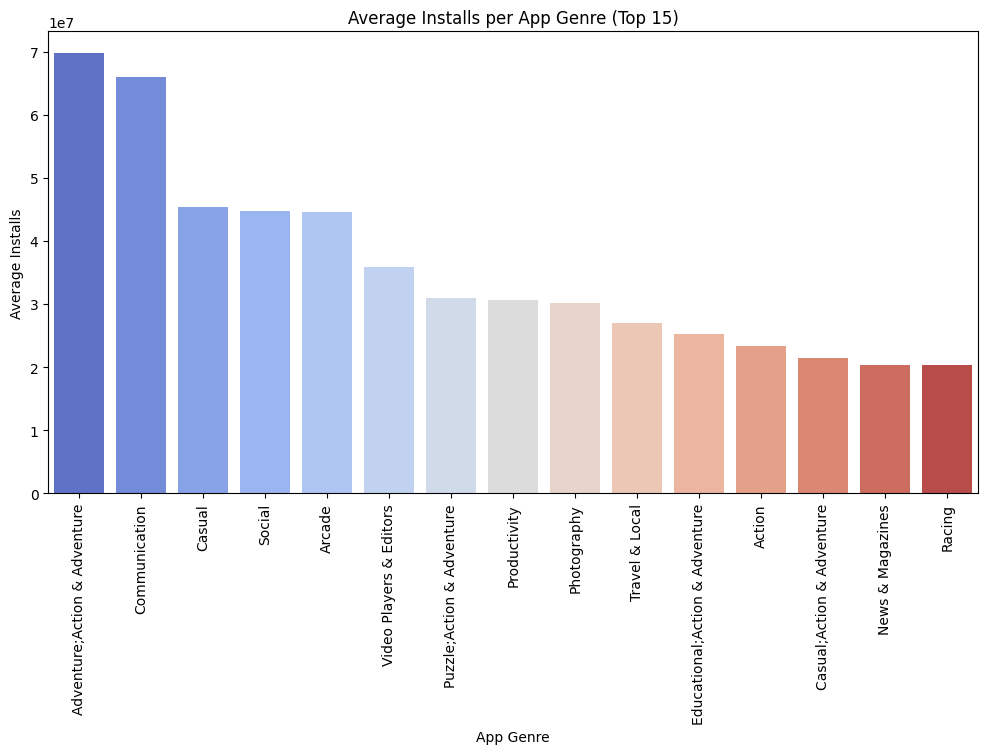

In [37]:
plt.figure(figsize=(12, 6))

# Calculate average installs for each genre
avg_installs = df1.groupby("Genres")["Installs"].mean().sort_values(ascending=False)

# Bar plot
sns.barplot(x=avg_installs.index[:15], y=avg_installs.values[:15], palette="coolwarm")  # Showing top 15 genres for clarity

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Labels and title
plt.xlabel("App Genre")
plt.ylabel("Average Installs")
plt.title("Average Installs per App Genre (Top 15)")

plt.show()


Expected Insights

✅ Social, Communication, Video Streaming, and Gaming genres likely have the highest installs.

✅ Genres like Finance, Productivity, and Health may have moderate installs but higher engagement.

✅ Niche genres (e.g., Lifestyle, Medical, and Dating) may have fewer installs but dedicated users.

Category 5 : User Satisfaction

1.) Relation of Reviews vs Installs

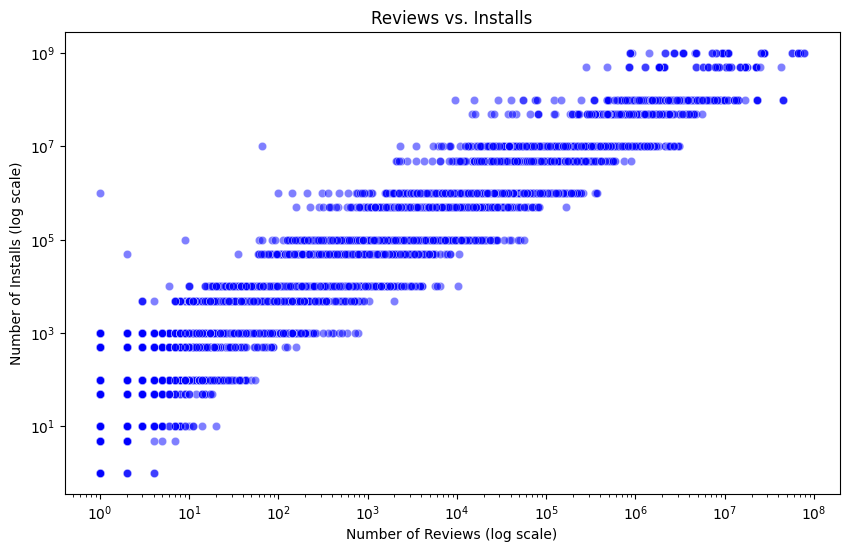

In [38]:
plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(x=df1["Reviews"], y=df1["Installs"], alpha=0.5, color="blue")

# Log scale for better visualization
plt.xscale("log")
plt.yscale("log")

# Labels and title
plt.xlabel("Number of Reviews (log scale)")
plt.ylabel("Number of Installs (log scale)")
plt.title("Reviews vs. Installs")

plt.show()


Expected Insights

✅ Apps with higher installs tend to have more reviews, indicating user engagement.

✅ Some apps might have high installs but fewer reviews, possibly due to inactive users or poor retention.

✅ Paid apps may have fewer installs and reviews compared to free apps.

#### Exploratory Data Analysis of User Review data

In [39]:
df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [44]:
df2.isnull().sum()

,0
App,0
Translated_Review,26868
Sentiment,26863
Sentiment_Polarity,26863
Sentiment_Subjectivity,26863


In [45]:
# Drop rows with missing values in key columns
df2.dropna(inplace=True)

In [46]:
# Convert sentiment categories to lowercase
df2["Sentiment"] = df2["Sentiment"].str.lower()

In [47]:
df2["Sentiment_Polarity"] = pd.to_numeric(df2["Sentiment_Polarity"])
df2["Sentiment_Subjectivity"] = pd.to_numeric(df2["Sentiment_Subjectivity"])


#### 1. Sentiment Distribution

<ipython-input-48-5aa2a8f90812>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df2["Sentiment"], palette="coolwarm")


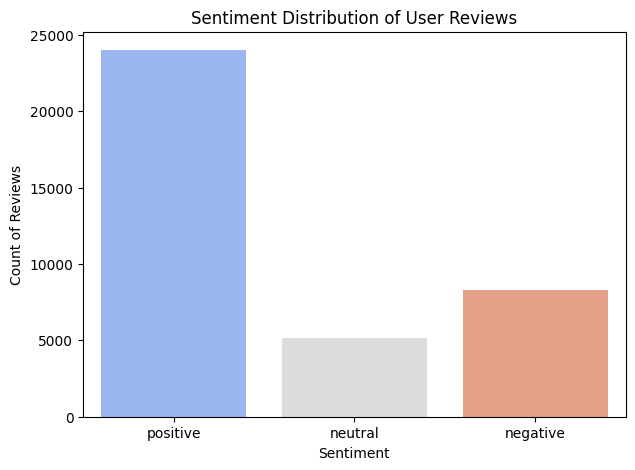

In [48]:
plt.figure(figsize=(7, 5))
sns.countplot(x=df2["Sentiment"], palette="coolwarm")

# Labels
plt.xlabel("Sentiment")
plt.ylabel("Count of Reviews")
plt.title("Sentiment Distribution of User Reviews")

plt.show()


Insights

✅ Most reviews are positive, followed by neutral and negative.

### 2. Sentiment Score Distribution

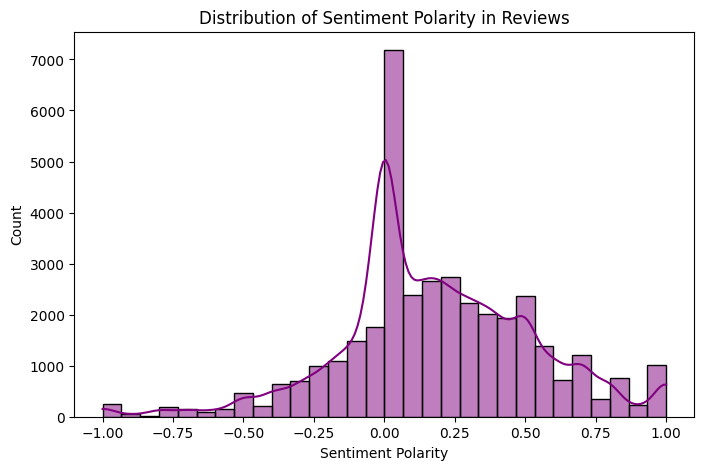

In [49]:
plt.figure(figsize=(8, 5))
sns.histplot(df2["Sentiment_Polarity"], bins=30, kde=True, color="purple")

# Labels
plt.xlabel("Sentiment Polarity")
plt.ylabel("Count")
plt.title("Distribution of Sentiment Polarity in Reviews")

plt.show()


Insights

✅ Polarity values close to -1 indicate strong negativity, while +1 indicates strong positivity.

✅ If the graph is skewed towards positive, users generally have good feedback.

### Sentiment Score vs. Sentiment Subjectivity

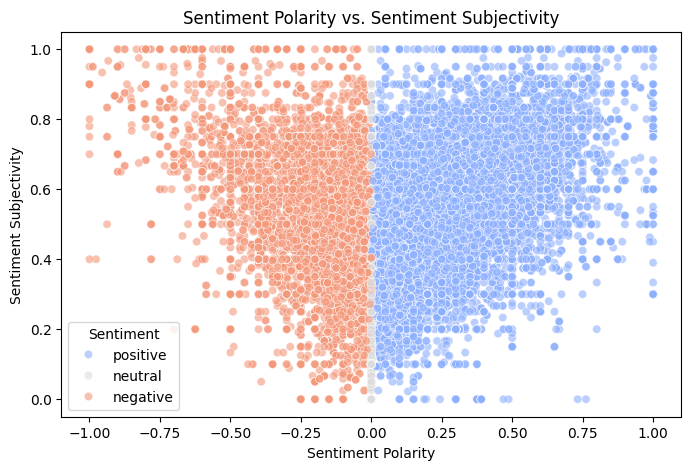

In [50]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df2["Sentiment_Polarity"],
                y=df2["Sentiment_Subjectivity"],
                hue=df2["Sentiment"],
                palette="coolwarm", alpha=0.6)

# Labels
plt.xlabel("Sentiment Polarity")
plt.ylabel("Sentiment Subjectivity")
plt.title("Sentiment Polarity vs. Sentiment Subjectivity")

plt.show()


Insights

✅ Higher subjectivity means the review is more opinion-based.

✅ If many reviews have high polarity and high subjectivity, users express strong emotions.

### App-wise Sentiment Analysis

In [53]:
# Get top 15 apps by installs
top_apps = df1.nlargest(15, 'Installs')["App"]

In [54]:
# Filter reviews for top apps
top_apps_reviews = df2[df2["App"].isin(top_apps)]

In [55]:
# Count sentiment types for each app
sentiment_counts = top_apps_reviews.groupby(["App", "Sentiment"]).size().unstack().fillna(0)

# Rename columns for clarity
sentiment_counts.columns = ["Negative", "Neutral", "Positive"]

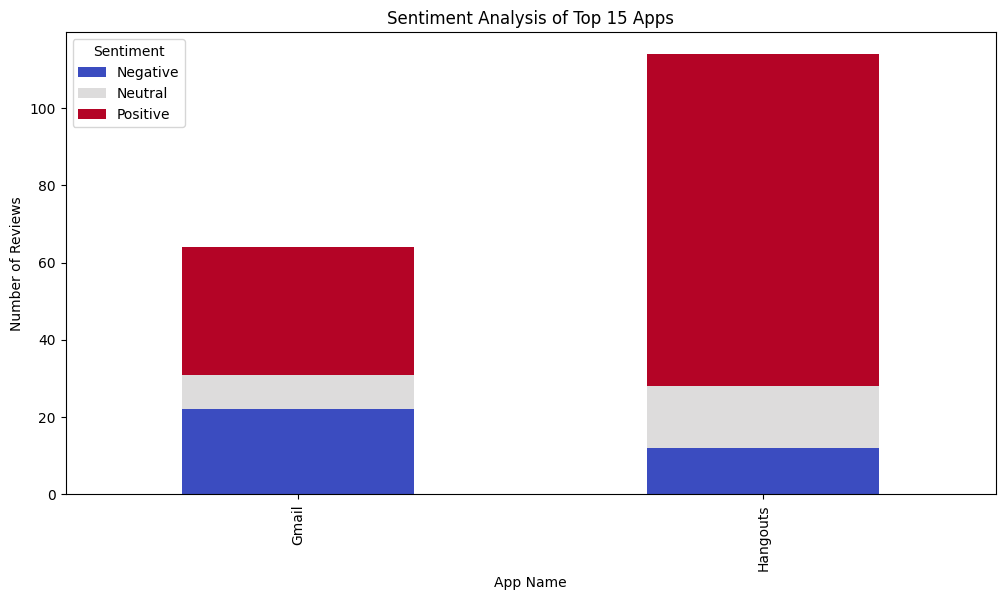

In [56]:
# Plot stacked bar chart
sentiment_counts.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="coolwarm")

plt.title("Sentiment Analysis of Top 15 Apps")
plt.xlabel("App Name")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=90)
plt.legend(title="Sentiment")
plt.show()

Insights from the Graph

✅ Apps with more positive reviews are likely to have higher user engagement.

✅ Some apps may have high negative sentiment, indicating areas for improvement.

✅ Neutral sentiment can indicate mixed or average experiences.

#### **Solution to the business objective**

✅ Enhance User Engagement & Ratings:

Encourage users to leave reviews and feedback through in-app prompts and incentives.
Respond to negative reviews to build trust and improve retention.

✅ Optimize Pricing Strategy:

Consider freemium models where basic features are free, with premium upgrades.
Price paid apps competitively with strong value differentiation.

✅ Leverage App Category Trends:

Invest in high-demand categories like Games, Communication, and Social Apps.
Focus on Education and Productivity apps for stable growth.

✅ Improve App Store Visibility & Sentiment:

Monitor sentiment trends and address concerns raised in negative reviews.
Improve app descriptions, screenshots, and branding to increase conversions.

✅ Target the Right Audience:

Broad audience apps (rated “Everyone”) should focus on maximizing reach.
Niche apps should optimize for high-value, engaged users rather than mass installs.

### **Conclusion**

User engagement and success depend on multiple factors, including ratings, reviews, sentiment, and app category.

Free apps generally outperform paid apps in terms of installs.

User feedback (reviews and sentiments) is crucial for improving and maintaining app popularity.

Premium apps must offer unique value propositions to justify pricing and attract loyal users.

Apps targeting broader audiences (Everyone-rated apps) achieve higher installs than niche apps.